In [ ]:
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#数据预处理(Data preprocessing)
由于有一些队伍没做改动，我很怀疑他们认真看review没，因此我把完全没改动的队伍去掉了


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage,dendrogram
from sklearn.cluster import KMeans
from sklearn import metrics
import seaborn as sns

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/conference/Kai统计/试验.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   team                      47 non-null     int64  
 1   comment_count             47 non-null     int64  
 2   problem_count             47 non-null     int64  
 3   suggestion_count          47 non-null     int64  
 4   tone_count                47 non-null     float64
 5   before_commit_count       47 non-null     int64  
 6   before_addition_count     47 non-null     int64  
 7   before_deletion_count     47 non-null     int64  
 8   before_file_change_count  47 non-null     int64  
 9   before_delta              47 non-null     int64  
 10  before_total_line_change  47 non-null     int64  
 11  after_commit_count        47 non-null     int64  
 12  after_addition_count      47 non-null     int64  
 13  after_deletion_count      47 non-null     int64  
 14  after_file_c

In [ ]:
data_cluster = data[['comment_count','problem_count','suggestion_count','tone_count']]
data_cluster.info()
print(data_cluster)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   comment_count     47 non-null     int64  
 1   problem_count     47 non-null     int64  
 2   suggestion_count  47 non-null     int64  
 3   tone_count        47 non-null     float64
dtypes: float64(1), int64(3)
memory usage: 1.6 KB
    comment_count  problem_count  suggestion_count  tone_count
0              57             14                 6   89.473684
1              77             25                 9   79.220779
2              50             27                10   62.000000
3              38             25                12   65.789474
4              54             39                10   48.148148
5              80             48                18   58.750000
6              68             36                19   73.529412
7              51             30                 6   45.098039

#聚类分析(Cluster Analysis)

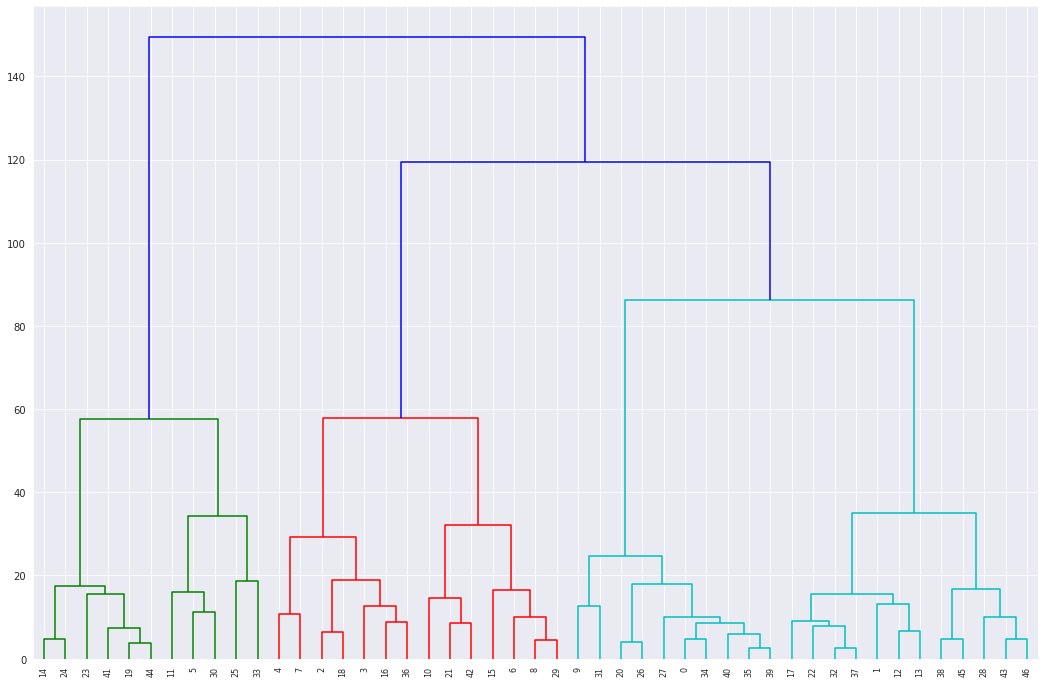

<Figure size 1440x864 with 0 Axes>

In [ ]:
#hierarchical cluster
z=linkage(data_cluster,method = 'ward',metric = 'euclidean')
p = dendrogram(z)
#plt.style.use('ggplot')
plt.figure(figsize=(20,12))
plt.show()

#Kmeans cluster

[0.35279938439126596]
[0.35279938439126596, 0.40189917453661705]
[0.35279938439126596, 0.40189917453661705, 0.4290803284396091]
[0.35279938439126596, 0.40189917453661705, 0.4290803284396091, 0.4013875421339573]
[0.35279938439126596, 0.40189917453661705, 0.4290803284396091, 0.4013875421339573, 0.39832681490696004]
[0.35279938439126596, 0.40189917453661705, 0.4290803284396091, 0.4013875421339573, 0.39832681490696004, 0.35883116799027054]
[0.35279938439126596, 0.40189917453661705, 0.4290803284396091, 0.4013875421339573, 0.39832681490696004, 0.35883116799027054, 0.35088688475750834]
[0.35279938439126596, 0.40189917453661705, 0.4290803284396091, 0.4013875421339573, 0.39832681490696004, 0.35883116799027054, 0.35088688475750834, 0.3682687317279579]
[0.35279938439126596, 0.40189917453661705, 0.4290803284396091, 0.4013875421339573, 0.39832681490696004, 0.35883116799027054, 0.35088688475750834, 0.3682687317279579, 0.3768942031288478]
[0.35279938439126596, 0.40189917453661705, 0.4290803284396091,

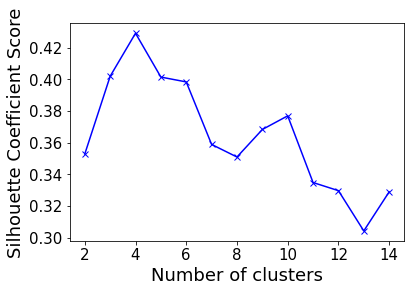

In [ ]:
#分别创建分群2-15的KMeans模型
clusters = range(2,15)
sc_scores = []
for k in clusters:  
    kmeans_model = KMeans(n_clusters=k).fit(data_cluster)
    sc_score = metrics.silhouette_score(data_cluster, kmeans_model.labels_,sample_size=10000, metric='euclidean')
    sc_scores.append(sc_score)
    print(sc_scores)
#作出K—平均轮廓系数曲线
plt.figure()
plt.plot(clusters, sc_scores, 'bx-')
plt.rcParams['figure.figsize'] = [18,12]
plt.xlabel('Number of clusters',fontsize=18)
plt.ylabel('Silhouette Coefficient Score',fontsize=18)  #样本平均轮廓系数
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
plt.figure(figsize=(12, 18))
data_cluster_1 = data_cluster.values
k=4
y_pred = KMeans(n_clusters = k).fit_predict(data_cluster_1)

In [29]:
#calculate the cluster center
kmodel = KMeans(n_clusters = k)
kmodel.fit(data_cluster)
a = kmodel.labels_
b = pd.DataFrame(a)
print(b)
result = b.apply(pd.value_counts)
result
print(kmodel.cluster_centers_)

    0
0   1
1   2
2   3
3   3
4   3
5   0
6   2
7   3
8   2
9   1
10  1
11  0
12  2
13  2
14  0
15  3
16  3
17  2
18  3
19  0
20  1
21  3
22  2
23  0
24  0
25  0
26  1
27  1
28  2
29  2
30  0
31  1
32  2
33  0
34  1
35  1
36  3
37  2
38  2
39  1
40  1
41  0
42  3
43  2
44  0
45  2
46  2
[[84.18181818 49.36363636 20.36363636 63.1803359 ]
 [55.81818182 16.27272727  9.90909091 87.49267122]
 [76.86666667 27.73333333 15.2        83.47100575]
 [50.1        30.2        11.5        59.05251259]]


Text(0.5, 1.0, 'KMeans cluster()')

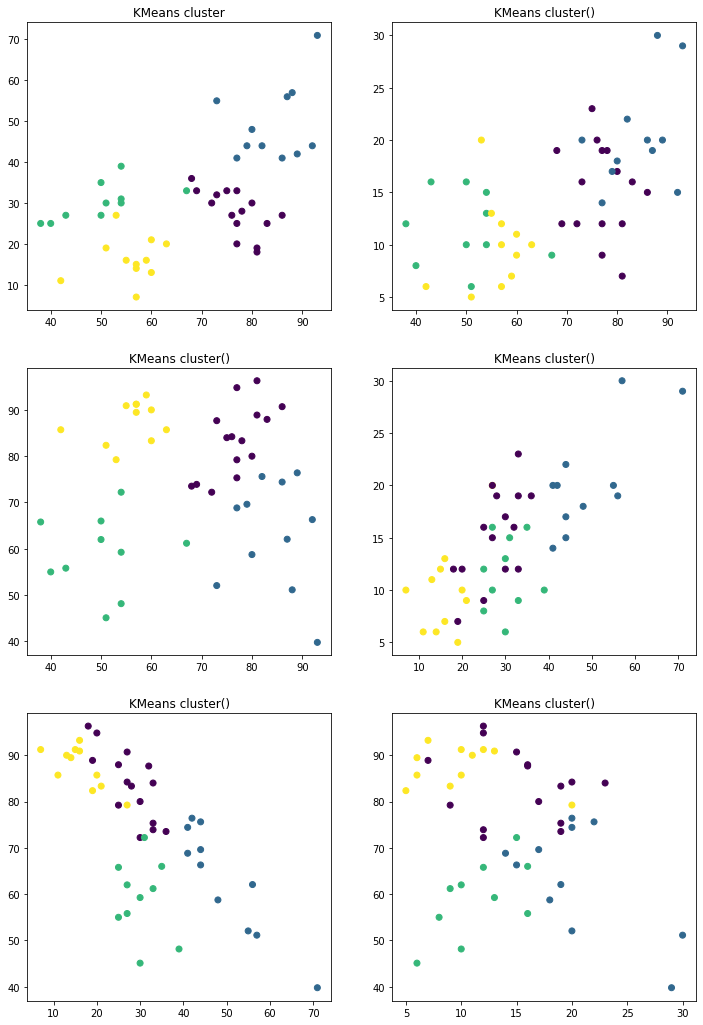

In [ ]:

plt.subplot(321)
plt.scatter(data_cluster_1[:, 0], data_cluster_1[:, 1], c=y_pred)
plt.title("KMeans cluster")

plt.subplot(322)
plt.scatter(data_cluster_1[:, 0], data_cluster_1[:, 2], c=y_pred)
plt.title("KMeans cluster()")

plt.subplot(323)
plt.scatter(data_cluster_1[:, 0], data_cluster_1[:, 3], c=y_pred)
plt.title("KMeans cluster()")

plt.subplot(324)
plt.scatter(data_cluster_1[:, 1], data_cluster_1[:, 2], c=y_pred)
plt.title("KMeans cluster()")

plt.subplot(325)
plt.scatter(data_cluster_1[:, 1], data_cluster_1[:, 3], c=y_pred)
plt.title("KMeans cluster()")

plt.subplot(326)
plt.scatter(data_cluster_1[:, 2], data_cluster_1[:, 3], c=y_pred)
plt.title("KMeans cluster()")

In [ ]:
data['y_pred'] = y_pred
print(data)
print(y_pred)
print(data[data['y_pred']==0])

     team  comment_count  ...  tone_count.1  y_pred
0   33389             57  ...            51       3
1   31983             77  ...            61       0
2   32843             50  ...            31       2
3   32776             38  ...            25       2
4   33401             54  ...            26       2
5   31998             80  ...            47       1
6   31969             68  ...            50       0
7   33407             51  ...            23       2
8   33382             69  ...            51       0
9   32931             51  ...            42       3
10  32789             53  ...            42       3
11  31996             73  ...            38       1
12  31991             77  ...            58       0
13  31972             80  ...            64       0
14  31975             77  ...            53       1
15  33379             67  ...            41       2
16  32782             40  ...            22       2
17  31994             73  ...            64       0
18  33388   

In [ ]:
data_corr = data[['comment_count','problem_count','suggestion_count','tone_count','%commit','%addition','%deletion','%file','%delta','%total_line','y_pred']]

#Calculate the correlation in each cluster

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


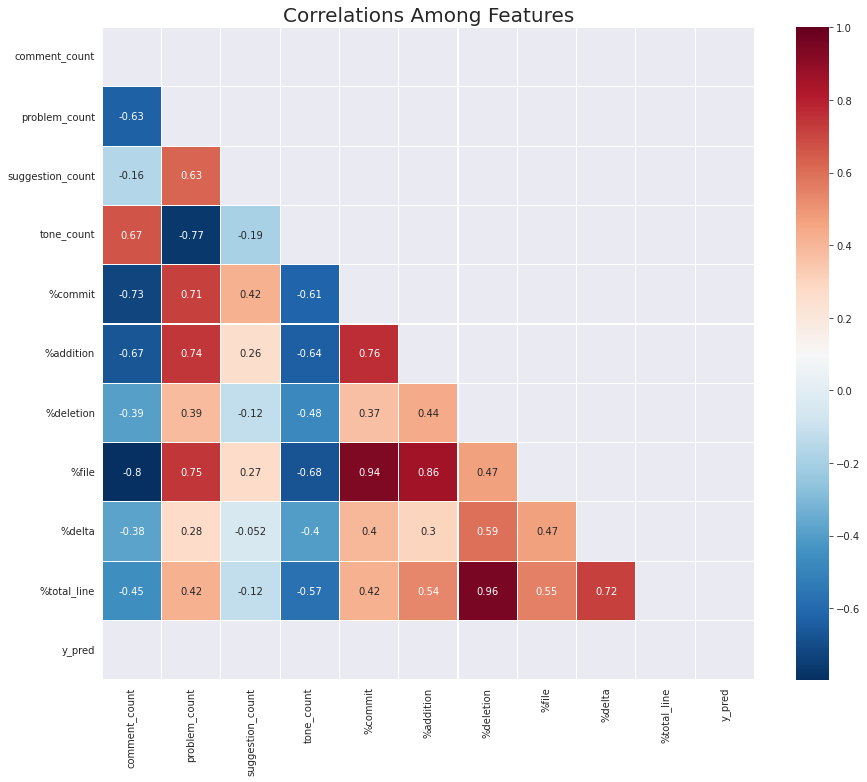

In [ ]:
#first cluster center [84.18181818 49.36363636 20.36363636 63.1803359]comment多 problem多 suggestion多 tone较高
# Calculate Pearson coefficient of correlation
sns.set_style("darkgrid")
mask = np.zeros_like(data_corr[data_corr['y_pred']==0].corr(), dtype=np.bool)  
#print(mask)
# Visualize correlation coefficients as a heatmap
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (15,12))
sns.heatmap(data_corr[data_corr['y_pred']==0].corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = 1,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


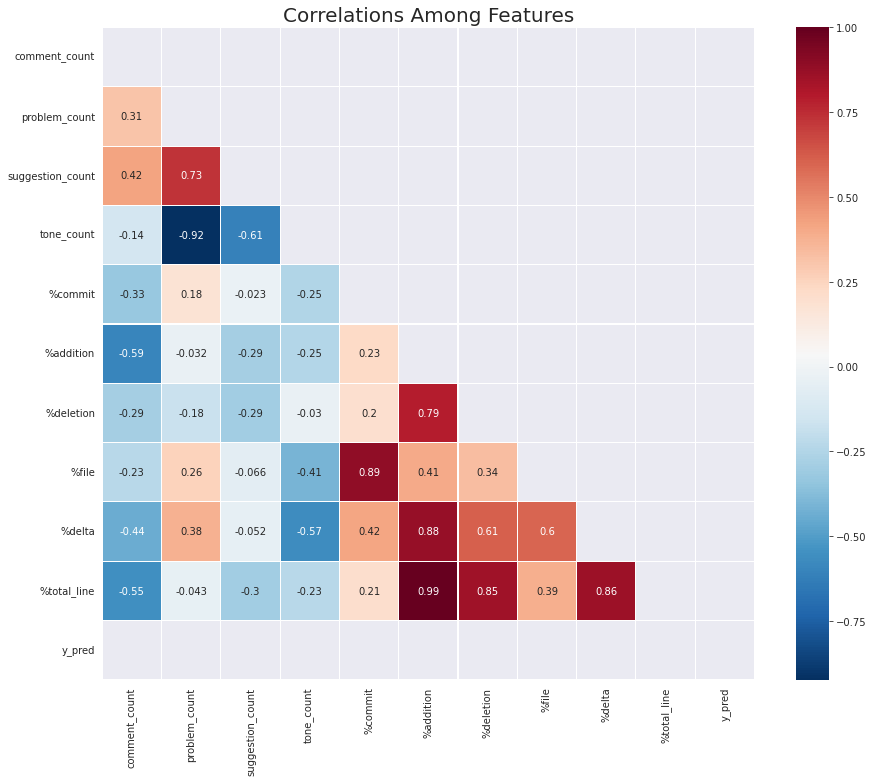

In [ ]:
#[55.81818182 16.27272727  9.90909091 87.49267122]comment少 problem少 suggestion少 tone高
# Calculate Pearson coefficient of correlation
sns.set_style("darkgrid")
mask = np.zeros_like(data_corr[data_corr['y_pred']==1].corr(), dtype=np.bool)  
#print(mask)
# Visualize correlation coefficients as a heatmap
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (15,12))
sns.heatmap(data_corr[data_corr['y_pred']==1].corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = 1,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


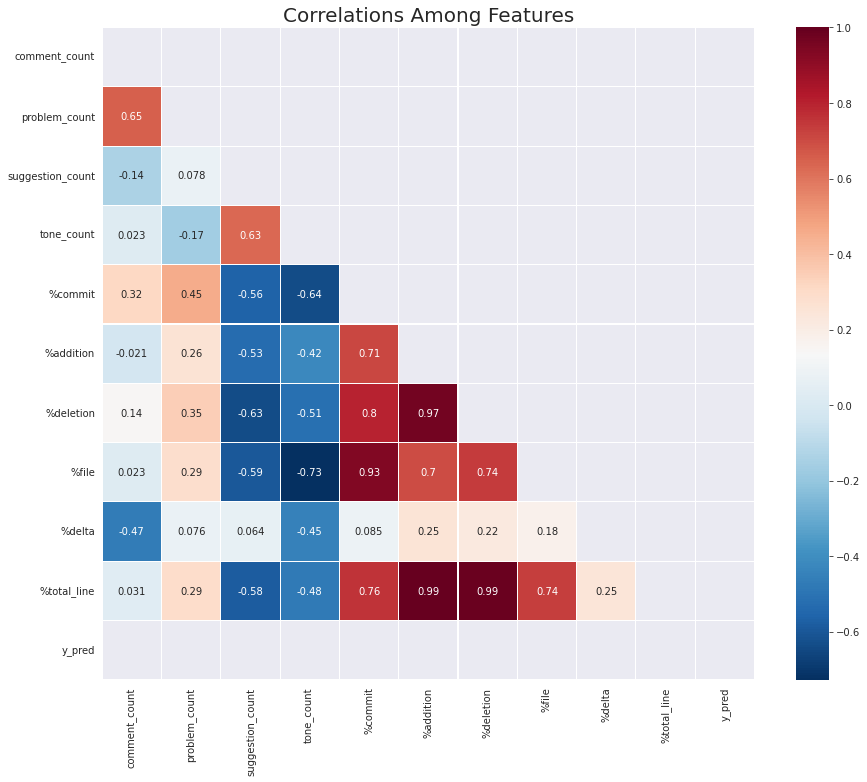

In [ ]:
#[76.86666667 27.73333333 15.2        83.47100575]#comment较多 problem较多 suggestion较多 tone高
# Calculate Pearson coefficient of correlation
sns.set_style("darkgrid")
mask = np.zeros_like(data_corr[data_corr['y_pred']==2].corr(), dtype=np.bool)  
#print(mask)
# Visualize correlation coefficients as a heatmap
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (15,12))
sns.heatmap(data_corr[data_corr['y_pred']==2].corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = 1,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


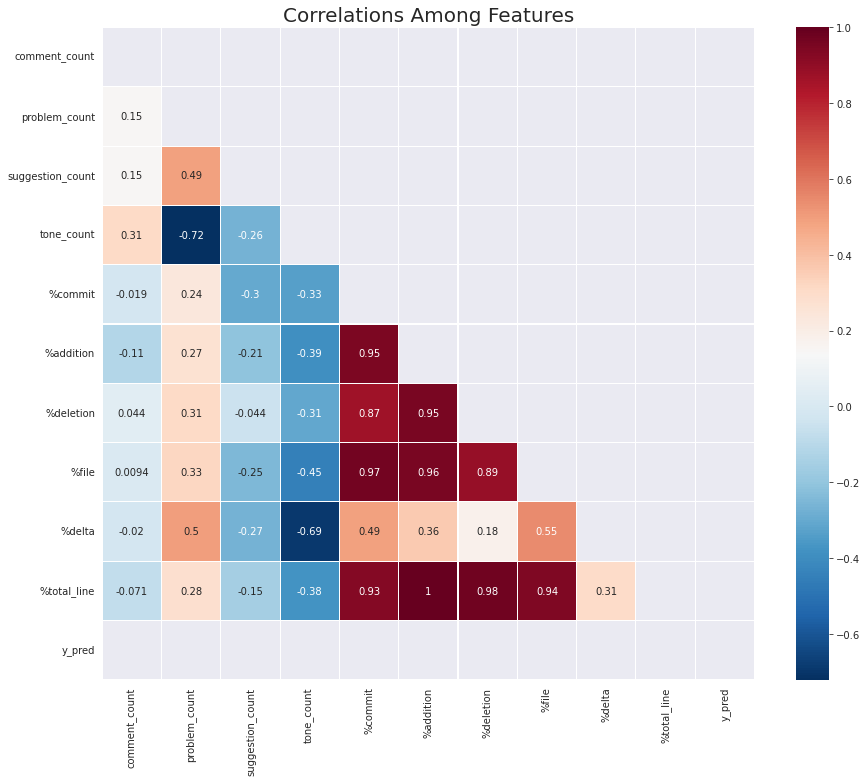

In [ ]:
#[50.1        30.2        11.5        59.05251259]comment少 problem较少 suggestion较少 tone较少
# Calculate Pearson coefficient of correlation
sns.set_style("darkgrid")
mask = np.zeros_like(data_corr[data_corr['y_pred']==3].corr(), dtype=np.bool)  
#print(mask)
# Visualize correlation coefficients as a heatmap
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (15,12))
sns.heatmap(data_corr[data_corr['y_pred']==3].corr(), 
            annot=True,
            mask = mask,
            cmap = 'RdBu_r',
            linewidths=0.1, 
            linecolor='white',
            vmax = 1,
            square=True)
plt.title("Correlations Among Features", y = 1.03,fontsize = 20)
plt.show()

#Future work
After clustering, we can do some further research like factor analysis and partial correlation analysis.



Factor analysis contains principle component analysis.